# ***Pre-Entrega Proyecto Final***

## Descripcion del proyecto

### Modelo de negocio

El proyecto aborda un modelo de negocio de hospedaje en una zona de turismo europea. Este hotel exclusivo se distingue por ofrecer una experiencia de alojamiento de alta calidad, basada en la excelencia de sus servicios y la comodidad de sus instalaciones.<br>El modelo de negocio se sustenta en la diversificación de fuentes de ingresos, que van más allá de la simple renta de habitaciones. Esto incluye la organización de eventos corporativos, bodas y celebraciones especiales, así como la oferta de paquetes turísticos completos que incluyen alojamiento, transporte y actividades recreativas.

### Problematica

La gerencia del hotel observa en el periodo que comprende desde mediados del año 2017 hasta finales del 2018 una sólida presencia de reservas canceladas, lo que implica una perdida de nuevos clientes y de potenciales reservas efectivas. 
Desde el área de toma de decisiones se deniega la posibilidad de cobrar un monto, a modo de garantia, por la reserva de los servicios contratados, ya que esto genera un gasto inmediato para el cliente al momento de planificar su viaje, por este motivo la empresa acude a nuestro de servicio de análisis de datos a fines de poder detectar cuales son las reservas que son candidatas a ser canceladas.

### Hipotesis

Considerando el modelo de negocio planteado y su desafío de predecir cancelaciones de reservas, se propone la siguiente hipótesis: ***Existe un conjunto de variables que pueden ser identificadas y ponderadas para predecir con precisión qué reservas serán canceladas***. Esta investigación se centrará en identificar qué variables tienen mayor influencia en la probabilidad de cancelación de una reserva. A través del análisis de estas variables y su impacto en la cancelación de reservas, se plantearán preguntas como: ***¿Qué factores específicos contribuyen significativamente a la probabilidad de cancelación?*** ***¿Cómo pueden estas variables ser utilizadas para desarrollar un modelo predictivo robusto?*** Al responder estas preguntas, se espera obtener información crucial para la toma de decisiones.

### Diccionario de datos

- Booking_ID: Identificador único de registro
- num_adults: Número de adultos en la reserva
- num_children: Número de niños en la reserva
- weekend_nights: Número de noches de semana reservados
- week_nights: Número de noches de fin de semana reservados
- meal_plan: Plan de comida seleccionado
- car_parking: Solicitud de espacio de estacionamiento (0=No; 1=Si)
- room_type: Tipo de habitación seleccionada en la reserva
- lead_time: Número de días de anticipación con que se realiza la reserva
- arrival_year: Año de la fecha de arribo al hotel
- arrival_month: Mes de la fecha de arribo al hotel
- arrival_date: Dia de la fecha de arribo al hotel
- mkt_segment: Medio por el cual se realiza la reserva
- repeated_guest: Si el cliente es un cliente regular (0=No; 1=Si)
- num_prev_cancellations: Número de reservas canceladas previamente
- num_prev_not_canceled: Número de reservas no canceladas previamente
- avg_price_room: Precio promedio de la habitación seleccionada en la reserva
- num_sp_requests: Número de solicitudes extra en la reserva
- booking_status: Estado de la reserva (No cancelada/Cancelada)

## Conociendo los datos

### Importacion de librerias

In [110]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

### Exploracion del dataset

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/arielRas/DataSets/main/Hotel_Reservations.csv')
df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,meal_plan,car_parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [112]:
print(f'La cantidad de filas y columnas es: {df.shape}\n\n')
df.info()

La cantidad de filas y columnas es: (36275, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Booking_ID              36275 non-null  object 
 1   num_adults              36275 non-null  int64  
 2   num_children            36275 non-null  int64  
 3   weekend_nights          36275 non-null  int64  
 4   week_nights             36275 non-null  int64  
 5   meal_plan               36275 non-null  object 
 6   car_parking             36275 non-null  int64  
 7   room_type               36275 non-null  object 
 8   lead_time               36275 non-null  int64  
 9   arrival_year            36275 non-null  int64  
 10  arrival_month           36275 non-null  int64  
 11  arrival_date            36275 non-null  int64  
 12  mkt_segment             36275 non-null  object 
 13  repeated_guest          36275 non-null  i

In [113]:
df.describe()

,num_adults,num_children,weekend_nights,week_nights,car_parking,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Data Wrangling

### Numero de adultos por reserva

Se puede divisar con el metodo ***describe()*** en la celda anterior que el minimo en de las columna ***num_adults*** es cero y segun las reglas de negocio de este hotel, en las reservas debe haber al menos un adulto (>= 18 años) por reserva, los menores no pueden reservar por si solos. En el caso de que la reserva solo tenga menores, se interpreta el dato como erroneo.

In [114]:
df.num_adults.describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: num_adults, dtype: float64

In [115]:
#Se imprime la cantidad de reservas sin adultos
print(f'La cantidad de reservas sin adultos es: {df.loc[df.num_adults < 1].shape[0]}')

La cantidad de reservas sin adultos es: 139


In [116]:
#Se eliminan las reservas y se verifica
df = df.loc[df.num_adults >= 1]
print(f'La cantidad de reservas sin adultos despues de la modificacion es: {df.loc[df.num_adults < 1].shape[0]}')

#Se imprime informacion del dataframe despues de eliminar registros
print(f'La cantidad de filas y columnas del dataframe despues de la modificacion es: {df.shape}')

La cantidad de reservas sin adultos despues de la modificacion es: 0
La cantidad de filas y columnas del dataframe despues de la modificacion es: (36136, 19)


### Numero de niños por reserva

Basado en el resultado del metodo ***describe()*** se puede ver que en la columna ***num_children*** hasta el valor del tercer cuartil es cero, lo que da la pauta de que en el 75% de los datos en esta variable es cero y su valor maximo es 10, como el valor maximo se aleja bastante del 3er cuartil, veremos si este valor es un outlier.

In [117]:
df.num_children.describe()

count    36136.000000
mean         0.097880
std          0.385097
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: num_children, dtype: float64

In [118]:
for item in range(0,11):
    print(f'La cantidad de reservas con {item} niños es: {df.loc[df.num_children == item].shape[0]}')

La cantidad de reservas con 0 niños es: 33577
La cantidad de reservas con 1 niños es: 1617
La cantidad de reservas con 2 niños es: 925
La cantidad de reservas con 3 niños es: 14
La cantidad de reservas con 4 niños es: 0
La cantidad de reservas con 5 niños es: 0
La cantidad de reservas con 6 niños es: 0
La cantidad de reservas con 7 niños es: 0
La cantidad de reservas con 8 niños es: 0
La cantidad de reservas con 9 niños es: 2
La cantidad de reservas con 10 niños es: 1


Como se puede observar hay valores atipicos que se alejan fuertemente de los datos, debido a la poca significancia cuantitativa de estos datos atipicos, se decide eliminar las observaciones que los contienen.

In [119]:
print(f'El cantidad de reservas con nro de niños mayor a 3 es: {df.loc[df.num_children > 3].shape[0]}')

df = df.loc[df.num_children <= 3]

print(f'La cantidad de filas y columnas del dataframe luego de la eliminacion es: {df.shape}')

El cantidad de reservas con nro de niños mayor a 3 es: 3
La cantidad de filas y columnas del dataframe luego de la eliminacion es: (36133, 19)


### Cantidad de dias de reserva

En este caso para cuantificar la cantidad de noches por las cuales se hacen las reservas disponemos de dos variables ***week_nights*** y ***weekend_nights***. Estas variables refieren la cantidad de noches de semana o fin de semana que tiene la reserva, pero el dataset no dispone de una variable de la cantidad de dias totales de la reserva, asi que en esta seccion agregaremos una nueva columna para poder agregar informacion referida a la cantidad de dias totales de la reserva.

In [120]:
booking_nights = df[['weekend_nights','week_nights']].copy()

#Se utiliza una funcion lambda dentro de apply() para aplicar una suma y obtener un resultado
booking_nights.loc[:,'total_nights'] = df.apply(lambda x: x['weekend_nights'] + x['week_nights'], axis=1)

booking_nights.head(3)

,weekend_nights,week_nights,total_nights
0,1,2,3
1,2,3,5
2,2,1,3


In [121]:
#Se quitan las columnas que no nos interesan
booking_nights.drop(columns=['weekend_nights','week_nights'], inplace=True, axis=0)
booking_nights.head(3)

,total_nights
0,3
1,5
2,3


In [122]:
#Se busca la posicion donde nos interesa que que se concatene el dataframe secundario
position = df.columns.get_loc('week_nights')

#Se concatena el dataframe pricipal con el secundario
df.insert(column='total_nights', loc=position+1, value=booking_nights.total_nights)
df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,total_nights,meal_plan,car_parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [123]:
#Se imprime informacion sobre la nueva columna
df.total_nights.describe()

count    36133.000000
mean         3.013782
std          1.785856
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: total_nights, dtype: float64

Como se puede observar en la celda anterior el valor minimo de presenta la variable es cero, y una reserva con cero noches es absurdo para nuestro analisis. Para este caso se decide eliminar estas observaciones que contienen cero noches reservadas ya que imputar el dato faltante podria no ser un reflejo solido de la realidad.

In [124]:
print(f'Cantidad de reservas con cero noches: {df.loc[df.total_nights == 0].shape[0]}')

Cantidad de reservas con cero noches: 78


In [125]:
#Se eliminan las reservas con cantidad de noches cero
df = df.loc[df.total_nights > 0]
print(f'Cantidad de reservas con cero noches: {df.loc[df.total_nights == 0].shape[0]}')

Cantidad de reservas con cero noches: 0


### Fechas y estacion del año para el arrivo

En este dataframe encontramos que no existe una variable definida para la ***fecha de arribo***, sino que este dato se encuentra dividido en una variable independienta para cada componente de la fecha. En esta seccion unificaremos estos datos para conseguir una variable de tipo fecha y realizar operaciones con ella.

Se crea un dataset complemetario en base a la columnas de que hacen a la fecha en si ubicadas en el dateaset primcipal. Una vez hecho esto se comienza con la transformacion

In [126]:
dates = df[['arrival_year','arrival_month', 'arrival_date']].copy()
dates.columns = ['y','m','d']
dates.head(3)

,y,m,d
0,2017,10,2
1,2018,11,6
2,2018,2,28


Se crea una nueva columna de tipo ***str*** en el dataset complementario concatenando los datos que hacen a la fecha.

In [127]:
dates.loc[:,'arrival_date'] = dates.apply(lambda x: str(x.y) + '-' + str(x.m) + '-' + str(x.d), axis=1)
dates.head(3)

,y,m,d,arrival_date
0,2017,10,2,2017-10-2
1,2018,11,6,2018-11-6
2,2018,2,28,2018-2-28


Si bien ya se ha obtenido la columna de fecha, esta tiene un tipo de dato ***str***, lo cual no es nuestro objetivo. Por ello se transformaran estos datos a tipo ***Datetime*** lo que va a generar algunos datos nulos que manejaremos posteriormente

In [128]:
dates['arrival_date'] = pd.to_datetime(dates.arrival_date, format="%Y-%m-%d",yearfirst=True, errors='coerce')
dates.arrival_date.info()

<class 'pandas.core.series.Series'>
Index: 36055 entries, 0 to 36274
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
36018 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 563.4 KB


In [129]:
#observando datos nulos
dates.loc[dates.arrival_date.isna()].head(5)

,y,m,d,arrival_date
2626,2018,2,29,NaT
3677,2018,2,29,NaT
5600,2018,2,29,NaT
6343,2018,2,29,NaT
7648,2018,2,29,NaT


Como se puede observar los datos ***NaN*** que se generaron al convertir de ***string*** a ***datetime*** fueron producidos por la fecha ***2018-02-29*** una fecha correspondiente a un año biciesto, pero justamente el año 2018 no lo fue. Para este caso en particular reemplazaremos las fechas conflictivas con la fecha del dia anterior.

In [130]:
condition = (dates.y == 2018) & (dates.m == 2) & (dates.d == 29)
dates.loc[condition, 'd'] = 28
dates.loc[dates.arrival_date.isna(), 'arrival_date'] = dates.apply(lambda x: pd.to_datetime(str(x.y) + '-' + str(x.m) + '-' + str(x.d), format="%Y-%m-%d",yearfirst=True), axis=1)
dates.arrival_date.info()

<class 'pandas.core.series.Series'>
Index: 36055 entries, 0 to 36274
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
36055 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.6 MB


Ahora es momento de crear la columna ***season*** que representa las estaciones del año (EUR) en que se realizara el arrivo al hotel, para ello se utilizara la columna de fecha generada anteriormente y una serie de condiciones booleanas que serviran para determinar en que periodo del año se encuentra la fecha.

In [131]:
#CREANDO ESTACIONES DEL AÑO (EUROPA)

#Creacion de variables
month = dates['arrival_date'].dt.month
date = dates['arrival_date'].dt.day

#se crean variables bcon condiciones a fin de establecer estaciones
is_summer = ((month == 6) & (date >= 21) | (month == 7) | (month == 8) | (month == 9) & (date <= 22))
is_autumn = ((month == 9) & (date >= 23) | (month == 10) | (month == 11) | (month == 12) & (date <= 20))
is_winter = ((month == 12) & (date >= 21) | (month == 1) | (month == 2) | (month == 3) & (date <= 20))

#Se crea la columna "Season" y se le asigna el valor "spring" para todos los valores de la columna
dates["arrival_season"] = "spring"

#Se asigna valores a la columna "season" segun la fecha
dates.loc[is_summer, "arrival_season"] = "summer"
dates.loc[is_autumn, "arrival_season"] = "autumn"
dates.loc[is_winter, "arrival_season"] = "winter"

dates.head(3)

,y,m,d,arrival_date,arrival_season
0,2017,10,2,2017-10-02,autumn
1,2018,11,6,2018-11-06,autumn
2,2018,2,28,2018-02-28,winter


Con el objetivo logrado parcialmente, ahora es momento de deshacerse de las columnas que no nos sirven en del dataframe principal y agregar las nuevas columnas que se consiguieron

In [132]:
#Se eliminan las variables que ya no nos interesan
df.drop(columns=['arrival_year','arrival_month'], inplace=True)

#Se agregan las nuevas columnas al dataframe principal
position = df.columns.get_loc('arrival_date')+1
df.arrival_date = dates.arrival_date
df.insert(column='arrival_season', loc=position, value=dates.arrival_season)

df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,total_nights,meal_plan,car_parking,room_type,lead_time,arrival_date,arrival_season,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,2017-10-02,autumn,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,2018-11-06,autumn,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,2018-02-28,winter,Online,0,0,0,60.00,0,Canceled


### Fecha de reserva

En esta seccion se toman las modificaciones realizadas en la seccion anterior, ya que se pudo obtener la fecha especifica del arrivo(***arrival_date***) y teniendo el dato de la cantidad de dias que pasaron entre la reserva y el arrivo(***lead_time***) vamos a obtener la fecha en que se realizo la reserva.

In [133]:
dates = df[['lead_time', 'arrival_date']].copy()
dates.loc[:, 'booking_date'] = dates.apply(lambda x: x.arrival_date - pd.to_timedelta(x.lead_time, unit='d'), axis=1)
dates.head(3)

,lead_time,arrival_date,booking_date
0,224,2017-10-02,2017-02-20
1,5,2018-11-06,2018-11-01
2,1,2018-02-28,2018-02-27


In [134]:
#Se agrega al Dataframe principal la columna creada
position = df.columns.get_loc('room_type')+1
df.insert(column='booking_date', loc=position, value=dates.booking_date)

del dates
df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,total_nights,meal_plan,car_parking,room_type,booking_date,lead_time,arrival_date,arrival_season,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,2017-02-20,224,2017-10-02,autumn,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,2018-11-01,5,2018-11-06,autumn,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,2018-02-27,1,2018-02-28,winter,Online,0,0,0,60.00,0,Canceled


### Variables cualitativas

En esta seccion se le da tratamiento a quellas variables que no son numericas. Para ello se utilizara la herramienta ***LabelEncoder*** destinado a las variables nominales, mientras que para las ordinales se lo hara respetando el orden inherente a su naturaleza.

In [135]:
#Se crea una lista con el nombre de las variables de tipo object/str
qualitative_var = [column for column in df.columns if df[column].dtype == 'object']
print(qualitative_var)

['Booking_ID', 'meal_plan', 'room_type', 'arrival_season', 'mkt_segment', 'booking_status']


Para explorar el contenido de cada variable cualitativa se imprime us valores unicos para cada una de ellas

In [136]:
#Se remueve el ID ya que no es una variable cualitativa sino una un identificador
qualitative_var.remove('Booking_ID')

#Impresion de valores unicos
for var in qualitative_var:
    print(f'{var}:')
    for item in df[var].unique():
        print(f'\t{item}')

meal_plan:
	Meal Plan 1
	Not Selected
	Meal Plan 2
	Meal Plan 3
room_type:
	Room_Type 1
	Room_Type 4
	Room_Type 6
	Room_Type 5
	Room_Type 2
	Room_Type 7
	Room_Type 3
arrival_season:
	autumn
	winter
	spring
	summer
mkt_segment:
	Offline
	Online
	Corporate
	Aviation
	Complementary
booking_status:
	Not_Canceled
	Canceled


Conociendo mejor el contenido de las variables cualitativas, se decide crear las siguientes variables numericas:
- meal_plan_id
- room_type_id
- booking_status_id
- mkt_segment_id
- arrival_season_id

Cada una corresponde a una variable cualitativa pero conteniendo un codigo numerico correspondiente a cada valor unico de la variable. Para aquellas que son de naturaleza ordinal se asignan los valores cuantitativos de manera manual a fin de conservar el orden natural de la variable. Mientras que para las nominales se utilza ***LabelEncoder***.

In [137]:
df_qualitative = df[qualitative_var].copy()

#Variables ordinales
df_qualitative['meal_plan_id'] = df_qualitative['meal_plan']
df_qualitative['meal_plan_id'] = df_qualitative['meal_plan_id'].str.replace('Not Selected', '0')
df_qualitative['meal_plan_id'] = df_qualitative['meal_plan_id'].str.replace(r'.*1$', '1', regex=True)
df_qualitative['meal_plan_id'] = df_qualitative['meal_plan_id'].str.replace(r'.*2$', '2', regex=True)
df_qualitative['meal_plan_id'] = df_qualitative['meal_plan_id'].str.replace(r'.*3$', '3', regex=True)
df_qualitative['meal_plan_id'] = df_qualitative['meal_plan_id'].astype(int)

df_qualitative['room_type_id'] = df_qualitative['room_type']
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].str.replace(r'.*1$', '1', regex=True)
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].str.replace(r'.*2$', '2', regex=True)
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].str.replace(r'.*3$', '3', regex=True)
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].str.replace(r'.*4$', '4', regex=True)
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].str.replace(r'.*5$', '5', regex=True)
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].str.replace(r'.*6$', '6', regex=True)
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].str.replace(r'.*7$', '7', regex=True)
df_qualitative['room_type_id'] = df_qualitative['room_type_id'].astype(int)

#Variables nominales
df_qualitative['booking_status_id'] = df_qualitative['booking_status']
df_qualitative['booking_status_id'] = df_qualitative['booking_status_id'].str.replace('Not_Canceled','0')
df_qualitative['booking_status_id'] = df_qualitative['booking_status_id'].str.replace('Canceled','1')
df_qualitative['booking_status_id'] = df_qualitative['booking_status_id'].astype(int)

encoder = LabelEncoder()
df_qualitative['mkt_segment_id'] = encoder.fit_transform(df_qualitative.mkt_segment.values)
df_qualitative['arrival_season_id'] = encoder.fit_transform(df_qualitative.arrival_season.values)

#Se eliminan variables que ya no necesitamos
df_qualitative.drop(columns=qualitative_var, inplace=True)

df_qualitative.head()

,meal_plan_id,room_type_id,booking_status_id,mkt_segment_id,arrival_season_id
0,1,1,0,3,0
1,0,1,0,4,0
2,1,1,1,4,3
3,1,1,1,4,1
4,0,1,1,4,1


Luego de crear las variables numericas se las insertan en el datafreme original

In [138]:
df.insert(column='meal_plan_id', loc=df.columns.get_loc('meal_plan')+1, value=df_qualitative.meal_plan_id)
df.insert(column='room_type_id', loc=df.columns.get_loc('room_type')+1, value=df_qualitative.room_type_id)
df.insert(column='booking_status_id', loc=df.columns.get_loc('booking_status')+1, value=df_qualitative.booking_status_id)
df.insert(column='mkt_segment_id', loc=df.columns.get_loc('mkt_segment')+1, value=df_qualitative.mkt_segment_id)
df.insert(column='arrival_season_id', loc=df.columns.get_loc('arrival_season')+1, value=df_qualitative.arrival_season_id)
del df_qualitative
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36055 entries, 0 to 36274
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Booking_ID              36055 non-null  object        
 1   num_adults              36055 non-null  int64         
 2   num_children            36055 non-null  int64         
 3   weekend_nights          36055 non-null  int64         
 4   week_nights             36055 non-null  int64         
 5   total_nights            36055 non-null  int64         
 6   meal_plan               36055 non-null  object        
 7   meal_plan_id            36055 non-null  int32         
 8   car_parking             36055 non-null  int64         
 9   room_type               36055 non-null  object        
 10  room_type_id            36055 non-null  int32         
 11  booking_date            36055 non-null  datetime64[ns]
 12  lead_time               36055 non-null  int64      

### Habitaciones con precio cero

Basado en el resultado del metodo ***describe()*** se puede ver que en la columna ***avg_price_room*** el minimo valor es cero y el precio de una habitacion no puede ser cero, asi que eliminaremos los registros con valor cero ya que a continuacion veremos que porcentaje de la informacion representan estas reservas.

In [139]:
df.avg_price_room.describe()

count    36055.000000
mean       103.733091
std         34.768071
min          0.000000
25%         80.750000
50%         99.880000
75%        120.355000
max        540.000000
Name: avg_price_room, dtype: float64

In [140]:
perc_price_cero = (df.loc[df.avg_price_room == 0].shape[0] / df.shape[0])*100
print(f'Cantidad de reservas con precio cero: {df.loc[df.avg_price_room == 0].shape[0]}')
print(f'Porcentaje de las reservas con precio cero en relacion al dataset principal: {perc_price_cero:.2f}%')

Cantidad de reservas con precio cero: 463
Porcentaje de las reservas con precio cero en relacion al dataset principal: 1.28%


In [141]:
df = df.loc[df.avg_price_room > 0]
df.avg_price_room.describe()

count    35592.000000
mean       105.082508
std         32.905017
min          0.500000
25%         81.000000
50%        100.000000
75%        121.000000
max        540.000000
Name: avg_price_room, dtype: float64

De esta manera descartamos los precios cero de las habitaciones  en las reservas, pero pudimos observar un valor minimo en la variable de 0.5 y por reglas de negocio el valor minimo aceptado en este campo es 10 EUR, por ende eliminaremos estas observaciones con valores que se interpretan como un error al momento de cargar la informacion.

In [142]:
perc_price_cero = (df.loc[df.avg_price_room < 10].shape[0] / df.shape[0])*100
print(f'Cantidad de reservas con precio cero: {df.loc[df.avg_price_room < 10].shape[0]}')
print(f'Porcentaje de las reservas con precio menor a 10 en relacion al dataset principal: {perc_price_cero:.2f}%')

Cantidad de reservas con precio cero: 40
Porcentaje de las reservas con precio menor a 10 en relacion al dataset principal: 0.11%


In [143]:
df = df.loc[df.avg_price_room >= 10]
df.avg_price_room.describe()

count    35552.000000
mean       105.196361
std         32.747768
min         12.000000
25%         81.000000
50%        100.000000
75%        121.000000
max        540.000000
Name: avg_price_room, dtype: float64

### Revision de outliers en variable ***avg_price_room***

Siguiendo con la variable ***avg_price_room*** en el ***describe*** anterior pudimos ver que el valor maximo de la variable se despega bastatante del percentil 75, por ende revisaremos si es que estos valores son atipicos o no.

In [144]:
df.avg_price_room.describe()

count    35552.000000
mean       105.196361
std         32.747768
min         12.000000
25%         81.000000
50%        100.000000
75%        121.000000
max        540.000000
Name: avg_price_room, dtype: float64

In [145]:
count = df.loc[df.avg_price_room > 300].shape[0]
perc = (count/df.shape[0])*100
print(f'La cantidad de precios por encima de 300 EUR es: {count}')
print(f'Estos {count} valores respresetan el {perc:.2f}% de los datos totales')

La cantidad de precios por encima de 300 EUR es: 9
Estos 9 valores respresetan el 0.03% de los datos totales


Viendo estos valores como outliers se deciden eliminarlos dada su minima cantidad y a su baja representacion porcentual de los datos

In [146]:
df = df.loc[df.avg_price_room < 300]
df.avg_price_room.describe()

count    35538.000000
mean       105.105415
std         32.408827
min         12.000000
25%         81.000000
50%        100.000000
75%        121.000000
max        299.330000
Name: avg_price_room, dtype: float64

### Variable objetivo ***booking_status***

En esta seccion se reemplazan los valores de la variable de interes solo para fines descriptivos, ya que al momento de entrenar el modelo tenemos la dicotomia intacta representada numericamente.

In [147]:
df.booking_status = df.booking_status.str.replace('Not_Canceled', 'No cancelada')
df.booking_status = df.booking_status.str.replace('Canceled', 'Cancelada')

## EDA

### Analisis de correlaciones

Se separan las variables segun su naturaleza a fines de aplicar el estadostico de correlacion correspondiente.

In [148]:
numeric_var = ['num_adults', 'num_children', 'weekend_nights','week_nights',
                'total_nights', 'lead_time','num_prev_cancellations',
                'num_prev_not_canceled', 'avg_price_room', 'num_sp_requests']

nominal_var = ['repeated_guest', 'car_parking', 'arrival_season_id', 'mkt_segment_id', 'booking_status_id']

ordinal_var = ['meal_plan_id','room_type_id']

#### Funciones de correlacion

In [149]:
def corr_spearman(numeric_var, ordinal_var) -> pd.DataFrame:
    df_corr = pd.DataFrame(index=numeric_var, columns=ordinal_var)
    for var_1 in numeric_var:
        for var_2 in ordinal_var:
            coef, _ =  stats.spearmanr(df[var_1], df[var_2])
            df_corr.loc[var_1, var_2] = coef
    df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
    return df_corr

def corr_biserial_point(numeric_var, nominal_var) -> pd.DataFrame:
    df_corr = pd.DataFrame(index=numeric_var, columns=nominal_var)
    for var_1 in numeric_var:
        for var_2 in nominal_var:
            coef, _ =  stats.pointbiserialr(df[var_2], df[var_1])
            df_corr.loc[var_1, var_2] = coef
    df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
    return df_corr

def contingency_coef(numeric_var, nominal_var) -> pd.DataFrame:
    df_corr = pd.DataFrame(index=numeric_var, columns=nominal_var)
    for var_1 in numeric_var:
        for var_2 in nominal_var:
            contingency_table = pd.crosstab(df[var_1], df[var_2])
            chi_2 = stats.chi2_contingency(contingency_table)
            df_corr.loc[var_1, var_2] = math.sqrt(chi_2.statistic/(df.shape[0]+chi_2.statistic))
    df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
    return df_corr

#### Correlaciones para variables cuantitativas

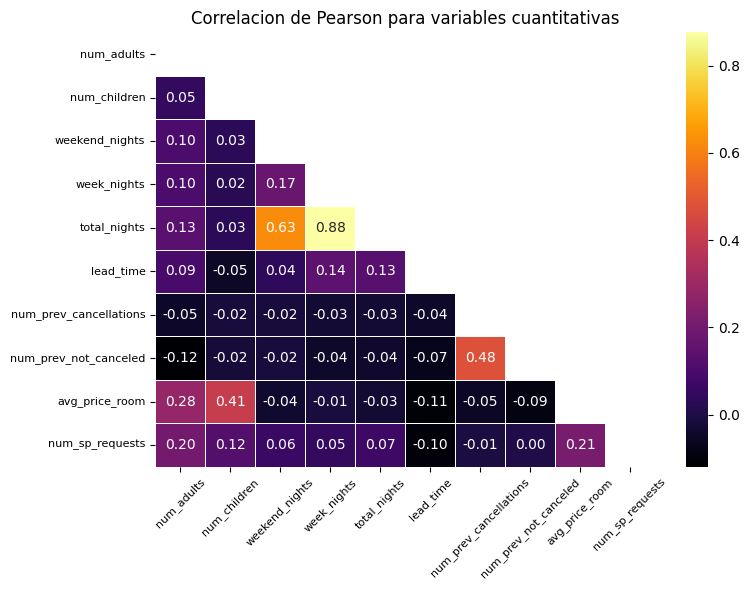

In [150]:
df_corr = df[numeric_var].corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, fmt=".2f", linewidth=.4, cmap='inferno', mask=mask)
plt.title('Correlacion de Pearson para variables cuantitativas')
plt.xticks(rotation=45, size=8)
plt.yticks(size=8)
plt.tight_layout()
plt.show()

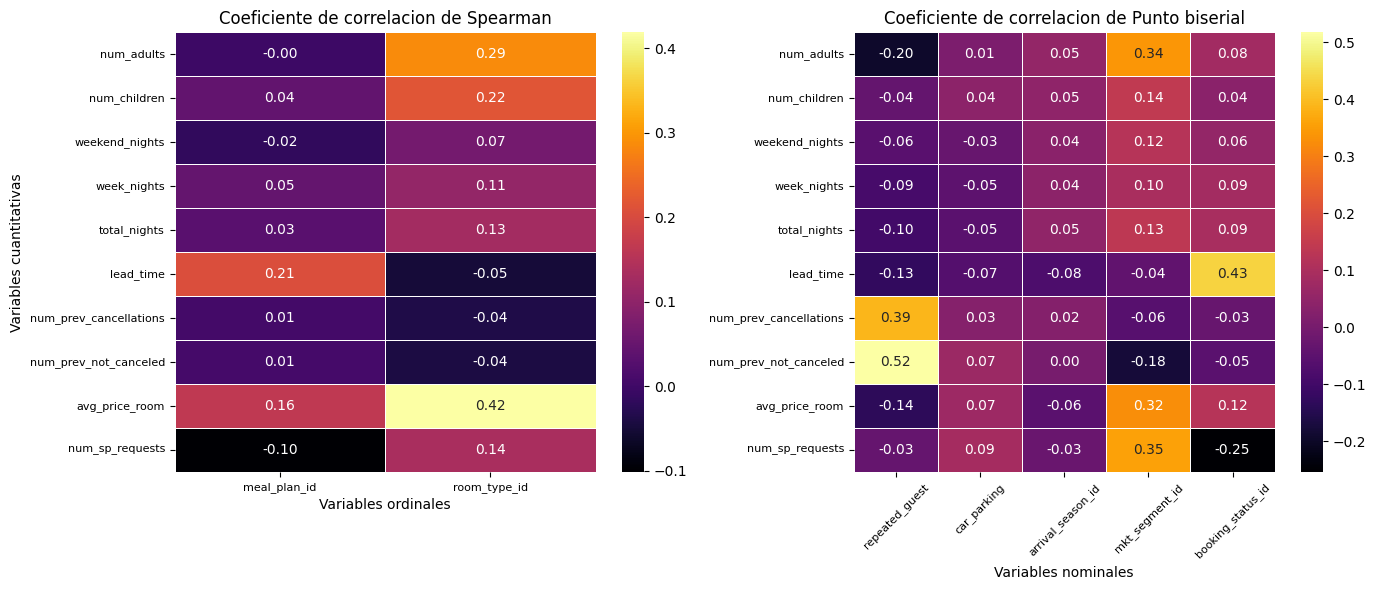

In [151]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,6))

df_corr = corr_spearman(numeric_var, ordinal_var)
sns.heatmap(df_corr, annot=True, fmt=".2f", linewidth=.4, cmap='inferno', ax=ax[0])
ax[0].set_title('Coeficiente de correlacion de Spearman')
ax[0].set_xlabel('Variables ordinales')
ax[0].set_ylabel('Variables cuantitativas')
ax[0].set_xticklabels(ax[0].get_xticklabels(), size=8)
ax[0].set_yticklabels(ax[0].get_yticklabels(), size=8)


df_corr = corr_biserial_point(numeric_var, nominal_var)
sns.heatmap(df_corr, annot=True, fmt = ".2f",linewidth=.4, cmap='inferno', ax=ax[1])
ax[1].set_title('Coeficiente de correlacion de Punto biserial')
ax[1].set_xlabel('Variables nominales')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, size=8)
ax[1].set_yticklabels(ax[1].get_yticklabels(), size=8)


plt.tight_layout()
plt.show()

#### Correlacion de variable Cualitativas

Se utiliza la ***coeficiente de contingencia*** para determinar la relacion entre las variables cualitativas. Para ello se obtiene el estadisitico de prueba ***Chi cuadrado*** utilizando la libreria ***scipy*** para posteriormente obtener el coeficiente con la formula que se muestra acontinuacion:
$$
C = \sqrt{\frac{x^2}{N+x^2}}
$$
X²: Estadistico Chi²<br>
N: Cantidadad de observaciones totales<br>
C: coeficiente de contingencia<br>

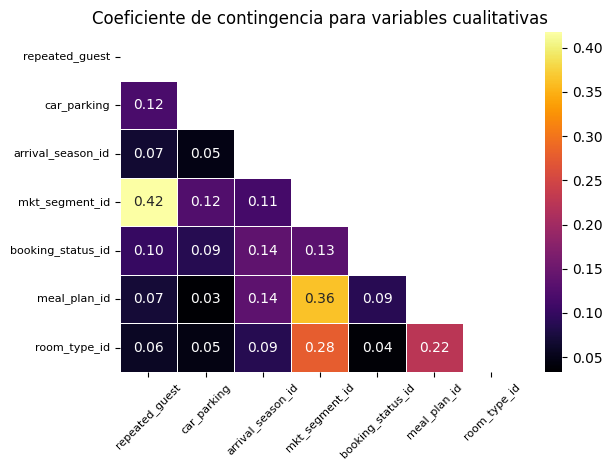

In [152]:
df_corr = contingency_coef(nominal_var+ordinal_var, nominal_var+ordinal_var)
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, annot=True, fmt=".2f", linewidth=.4, cmap='inferno', mask=mask)
plt.title('Coeficiente de contingencia para variables cualitativas')
plt.xticks(rotation=45, size=8)
plt.yticks(size=8)
plt.tight_layout()
plt.show()

### Graficos

#### Analisis univariado

En este apartado se analizan variables de manera individual a fines de entender su compartamiento y distribucion

##### Comportamiento de las reservas canceladas y no canceladas

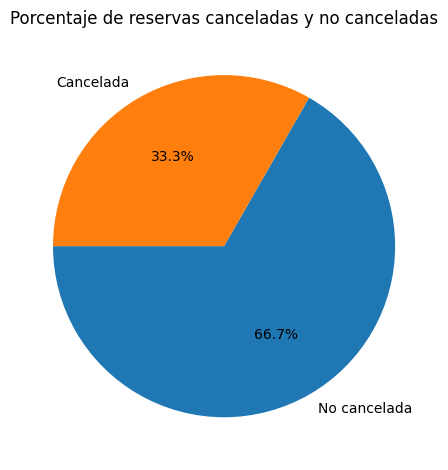

In [153]:
count = df.booking_status.value_counts()
plt.pie(count, labels=['No cancelada', 'Cancelada'], autopct='%1.1f%%', startangle=180)
plt.title('Porcentaje de reservas canceladas y no canceladas')

plt.tight_layout()
plt.show()

In [154]:
bookings = df[['arrival_date', 'booking_status']].copy()
bookings['y'] = bookings.arrival_date.dt.year
bookings['m'] = bookings.arrival_date.dt.month

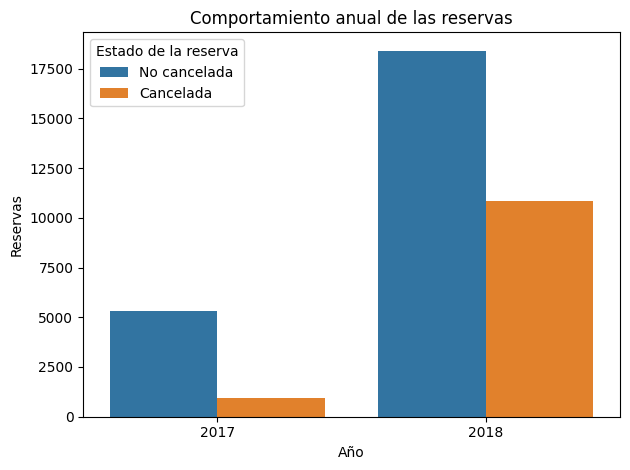

In [155]:
sns.countplot(data=bookings, x='y', hue='booking_status')
plt.title('Comportamiento anual de las reservas')
plt.xlabel('Año')
plt.ylabel('Reservas')
plt.legend(title='Estado de la reserva')
plt.tight_layout()
plt.show()

In [156]:
bookings = bookings.groupby(['y', 'm', 'booking_status'])['booking_status'].count().reset_index(name='count')

not_canceled_2017 = bookings.loc[(bookings.y == 2017)&(bookings.booking_status == 'No cancelada')]
canceled_2017 = bookings.loc[(bookings.y == 2017)&(bookings.booking_status == 'Cancelada')]

not_canceled_2018 = bookings.loc[(bookings.y == 2018)&(bookings.booking_status == 'No cancelada')]
canceled_2018 = bookings.loc[(bookings.y == 2018)&(bookings.booking_status == 'Cancelada')]

In [157]:
months = ['Ene','Feb','Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

fig = go.Figure()

fig.add_trace(go.Scatter(x=not_canceled_2017.m,
                        y=not_canceled_2017['count'],
                        mode='lines+markers',
                        name='2017 - No canceladas',
                        line=dict(color='firebrick', width=3)))

fig.add_trace(go.Scatter(x=canceled_2017.m,
                        y=canceled_2017['count'],
                        #mode='lines+markers',
                        name='2017 - Canceladas',
                        line=dict(color='firebrick', width=3, dash='dot')))

fig.add_trace(go.Scatter(x=not_canceled_2018.m,
                        y=not_canceled_2018['count'],
                        mode='lines+markers',
                        name='2018 - No canceladas',
                        line=dict(color='royalblue', width=3)))

fig.add_trace(go.Scatter(x=canceled_2018.m,
                        y=canceled_2018['count'],
                        #mode='lines+markers',
                        name='2018 - Canceladas',
                        line=dict(color='royalblue', width=3, dash='dot')))

fig.update_layout(title='Comportamiento mensual de las reservas entre mediados de 2017 y 2018',
                  xaxis_title='Mes',
                  yaxis_title='Conteo',
                  xaxis=dict(tickvals=list(range(1, 13)), ticktext=months),  # Cambiar las etiquetas del eje x
                  showlegend=True,
                  width=1200,
                  height=500)


fig.show()

##### Distribucion del precio  promedio de la habitacion

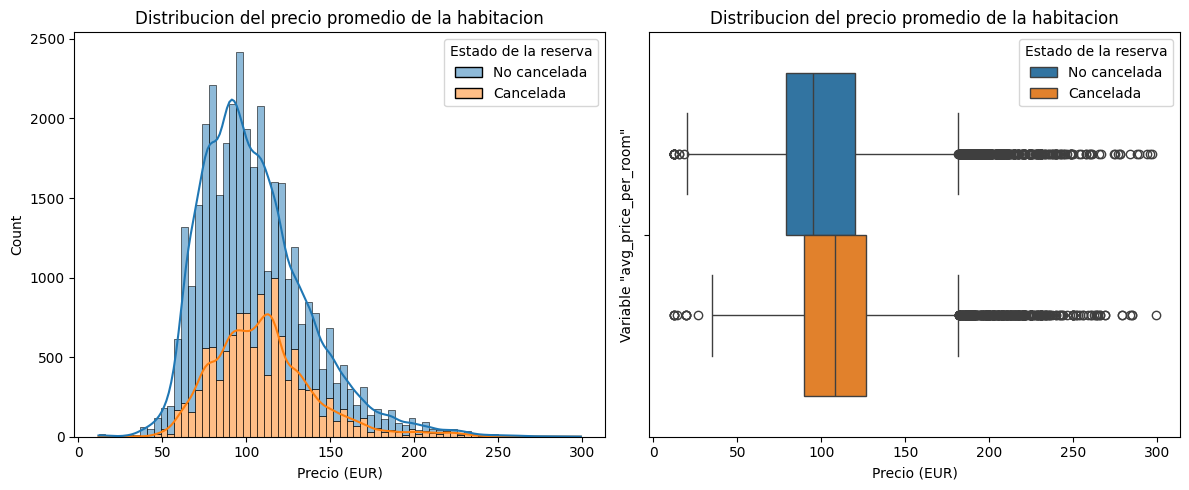

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.avg_price_room, hue=df.booking_status, multiple='stack',bins=70, kde=True, ax=ax[0])
ax[0].set_title('Distribucion del precio promedio de la habitacion')
ax[0].set_xlabel('Precio (EUR)')
ax[0].get_legend().set_title('Estado de la reserva')

sns.boxplot(x=df.avg_price_room, hue=df.booking_status, ax=ax[1])
ax[1].set_title('Distribucion del precio promedio de la habitacion')
ax[1].set_xlabel('Precio (EUR)')
ax[1].set_ylabel('Variable "avg_price_per_room"')
ax[1].get_legend().set_title('Estado de la reserva')
plt.tight_layout()
plt.show()

##### Distribucion de los dias entre la reserva y el arribo

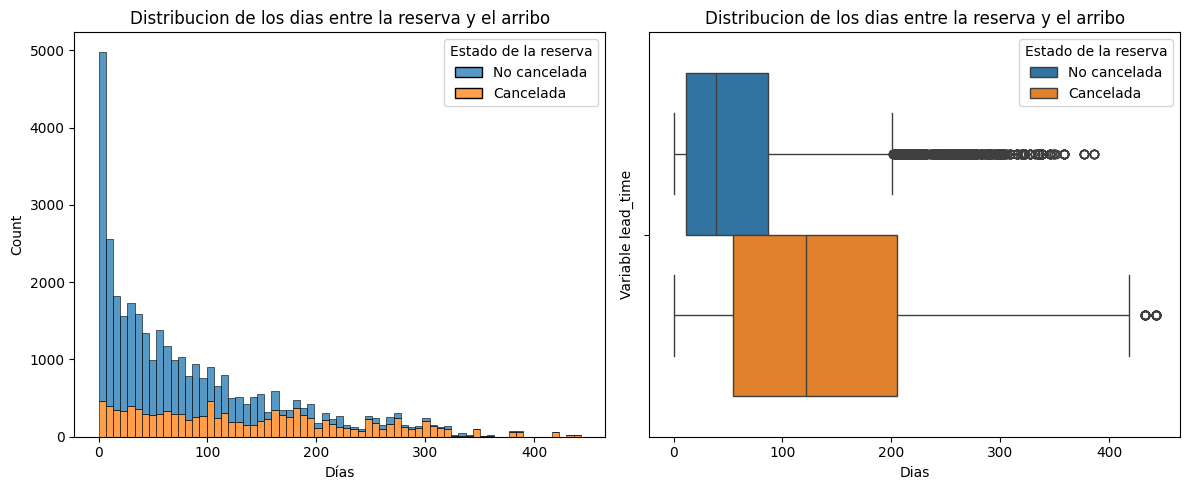

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.lead_time, hue=df.booking_status, multiple='stack', ax=ax[0])
ax[0].set_title('Distribucion de los dias entre la reserva y el arribo')
ax[0].set_xlabel('Días')
ax[0].get_legend().set_title('Estado de la reserva')

sns.boxplot(x=df.lead_time, hue=df.booking_status, ax=ax[1])
ax[1].set_title('Distribucion de los dias entre la reserva y el arribo')
ax[1].set_xlabel('Dias')
ax[1].set_ylabel('Variable lead_time')
ax[1].get_legend().set_title('Estado de la reserva')
plt.tight_layout()
plt.show()

##### Distribucion del numero de peticiones especiales en la reserva

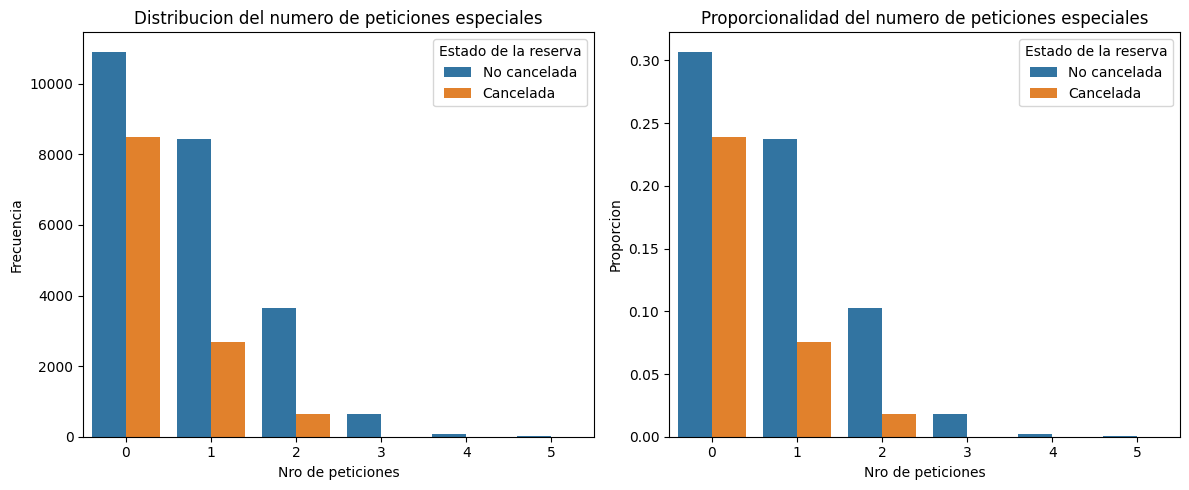

In [160]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.countplot(x=df.num_sp_requests , hue=df.booking_status, ax=ax[0])
ax[0].set_title('Distribucion del numero de peticiones especiales')
ax[0].set_xlabel('Nro de peticiones')
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

sns.countplot(x=df.num_sp_requests , hue=df.booking_status, stat='proportion', ax=ax[1])
ax[1].set_title('Proporcionalidad del numero de peticiones especiales')
ax[1].set_xlabel('Nro de peticiones')
ax[1].set_ylabel('Proporcion')
ax[1].get_legend().set_title('Estado de la reserva')

plt.legend(title='Estado de la reserva')
plt.tight_layout()
plt.show()

#### Analisis Bivariado

##### Precio de habitacion VS Dias entre reserva y arribo

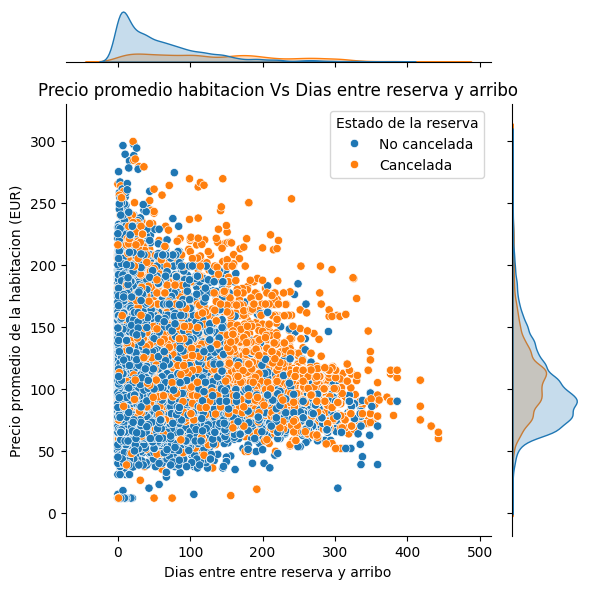

In [161]:
sns.jointplot(data=df, x='lead_time', y='avg_price_room', hue='booking_status')
plt.title('Precio promedio habitacion Vs Dias entre reserva y arribo')
plt.xlabel('Dias entre entre reserva y arribo')
plt.ylabel('Precio promedio de la habitacion (EUR)')
plt.legend(title='Estado de la reserva')

plt.tight_layout()
plt.show()

##### Nro de peticiones VS Precio promedio de habitacion - Nro de peticiones VS Dias entre la reserva y el arribo

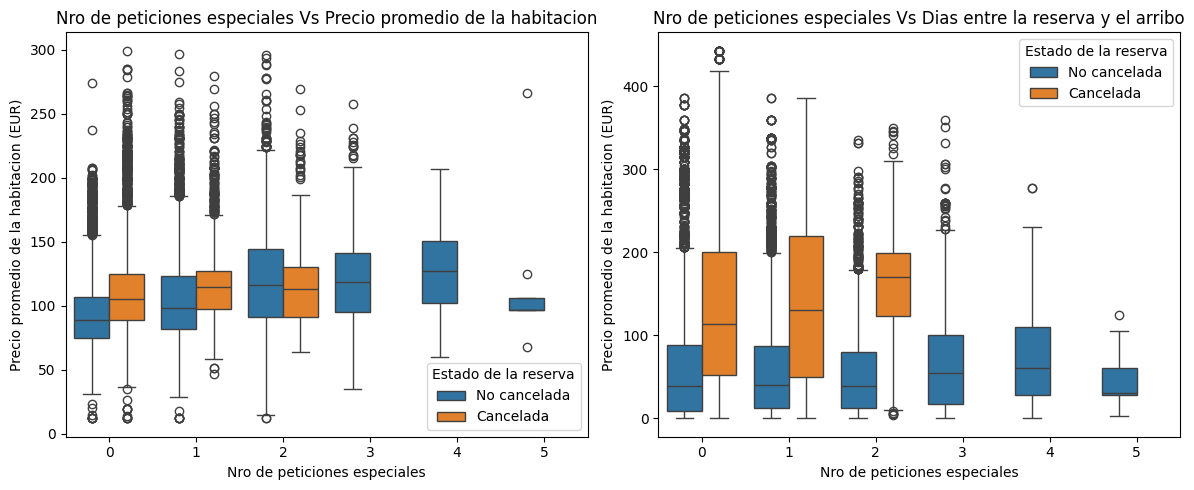

In [162]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.boxplot(data=df, x='num_sp_requests', y='avg_price_room', hue='booking_status', ax=ax[0])
ax[0].set_title('Nro de peticiones especiales Vs Precio promedio de la habitacion')
ax[0].set_xlabel('Nro de peticiones especiales')
ax[0].set_ylabel('Precio promedio de la habitacion (EUR)')
ax[0].get_legend().set_title('Estado de la reserva')

sns.boxplot(data=df, x='num_sp_requests', y='lead_time', hue='booking_status', ax=ax[1])
ax[1].set_title('Nro de peticiones especiales Vs Dias entre la reserva y el arribo')
ax[1].set_xlabel('Nro de peticiones especiales')
ax[1].set_ylabel('Precio promedio de la habitacion (EUR)')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()

#### Analisis multivariado

En este grafico se pueden divisar la ubicacion en el espacion de los puntos en relacion a las 3 variables insight, tambien es ligeramente visible cierta agrupacion de las reservas canceladas.

In [163]:
fig = px.scatter_3d(df, x='avg_price_room', y='lead_time', z='num_sp_requests', color='booking_status')

fig.update_layout(title='Precio pormedio VS Dias entre reserva y arrivo VS Peticiones especiales',
                  xaxis_title='Mes',
                  yaxis_title='Conteo',
                  showlegend=True,
                  legend_title_text='Estado de la reserva',
                  scene=dict(
                      xaxis=dict(title='Precio promedio por habitación'),
                      yaxis=dict(title='Días entre reserva y llegada'),
                      zaxis=dict(title='Número de peticiones especiales')
                  ),
                  width=850,
                  height=750)

fig.show()